In [1]:
import numpy as np
import pandas as pd
import scipy
import json

In [2]:
# pd.options.display.max_rows = 20
# pd.set_option('display.max_columns', None)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from matplotlib import cm
import seaborn as sns

-------

In [4]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
date

'2024-01-19'

-------

# Results Figures

### Load Results

In [5]:
results_dir = './results/'

In [6]:
final_file_str = 'stage1-iter4'

---------

In [7]:
with open('analysis-config.json') as cfg_json:
    viz_config = json.load(cfg_json)
viz_config

{'exclude_timepts': [0],
 'pseudocount_value': 0.5,
 'min_trustworthy_count': 300,
 'max_trustworthy_count': 99999999999999,
 'min_num_trustworthy_assays': 0,
 'init_bias_prevalence_mean': 0,
 'init_bias_prevalence_stdev': 0.01,
 'init_bias_susceptibility_mean': 0,
 'init_bias_susceptibility_stdev': 0.01,
 'regression_weight_saturation_count': 300,
 'sample_bias_penalty': 1,
 'variant_bias_penalty': 3,
 'target_bias_prevalence_stdev': 0.1,
 'min_mean_count_linear_fits': 25}

In [8]:
viz_samplesInfo = pd.read_csv(results_dir+f'samples_{final_file_str}.csv')
viz_samplesInfo

,chen_sample_label,sample,assay,assay_set,treatment,rep,timept,total_raw_count,bias_prevalence,normalization_factor
0,hBFA1-21C-R1-Time8,hBFA1:21C-R1-8,hBFA1:21C-R1,hBFA1,21C,R1,8,1917150,-0.284388,688.599180
1,hBFA1-21C-R1-Time16,hBFA1:21C-R1-16,hBFA1:21C-R1,hBFA1,21C,R1,16,2168035,-0.282644,789.393288
2,hBFA1-21C-R1-Time24,hBFA1:21C-R1-24,hBFA1:21C-R1,hBFA1,21C,R1,24,2068099,-0.280646,753.376046
3,hBFA1-21C-R1-Time40,hBFA1:21C-R1-40,hBFA1:21C-R1,hBFA1,21C,R1,40,2118452,-0.279071,607.394669
4,hBFA1-21C-R2-Time8,hBFA1:21C-R2-8,hBFA1:21C-R2,hBFA1,21C,R2,8,2111700,-0.347480,742.204489
...,...,...,...,...,...,...,...,...,...,...
63,hBFA1-pH7_3-R1-Time40,hBFA1:pH7.3-R1-40,hBFA1:pH7.3-R1,hBFA1,pH7.3,R1,40,2719186,-0.103617,912.480231
64,hBFA1-pH7_3-R2-Time8,hBFA1:pH7.3-R2-8,hBFA1:pH7.3-R2,hBFA1,pH7.3,R2,8,2757245,-0.179716,917.056630
65,hBFA1-pH7_3-R2-Time16,hBFA1:pH7.3-R2-16,hBFA1:pH7.3-R2,hBFA1,pH7.3,R2,16,2680456,-0.180361,937.444886
66,hBFA1-pH7_3-R2-Time24,hBFA1:pH7.3-R2-24,hBFA1:pH7.3-R2,hBFA1,pH7.3,R2,24,2585981,-0.181877,881.032083


In [9]:
viz_variantsInfo = pd.read_csv(results_dir+f'variants_{final_file_str}.csv')
viz_variantsInfo

,barcode_full,barcode_diverse,barcode_environment,total_counts,subpool_environment,which_subpools,putative_environment,barcode_GCratio,neutral_group,control_set,bias_susceptibility
0,ATAAAAAAGCACAAGCCTTTTGACGACACCTAAATTAGTTATCCAT...,ATAAAAAAGCACAAGCCTTTTGACGA,CACCTAAATTAGTTATCCATTCGGCT,9616313,not_read,not_read,SC_2N,0.365385,NaN,False,79.701881
1,CGATAAACCCACAATATGATTATCGGTACACAAGAGGGTTTCTGTT...,CGATAAACCCACAATATGATTATCGG,TACACAAGAGGGTTTCTGTTTTATGG,6648391,not_read,not_read,SC_alpha,0.384615,NaN,False,23.919750
2,CGCACAAGAAAGAATAATCTTGAATTGGTAAAACCAGATTTGGCAT...,CGCACAAGAAAGAATAATCTTGAATT,GGTAAAACCAGATTTGGCATTCACTA,3368497,GlyEtOH_alpha,-R1-Subpool.-R1-autodiploids,GlyEtOH_alpha,0.346154,NaN,False,135.553279
3,ACAAAAAGATATAACAAGCTTGAAGACCCGAAAAAGTTTTTTATCT...,ACAAAAAGATATAACAAGCTTGAAGA,CCCGAAAAAGTTTTTTATCTTCAATG,2082320,FLC4_alpha,-R1-Subpool,FLC4_alpha,0.288462,NaN,False,43.690137
4,AATAAAAGAAGGAAAAGCATTTAAACAAACAAACTTTCTTTTTTCT...,AATAAAAGAAGGAAAAGCATTTAAAC,AAACAAACTTTCTTTTTTCTTTATGC,2013526,YPD_alpha,-R1-Subpool,contam-pH3_8_2N,0.230769,NaN,False,141.969257
...,...,...,...,...,...,...,...,...,...,...,...
2581,CACGCAAAACTTTATTCAATAACTTCGTCCGCCAATCATATTGTAC...,CACGCAAAACTTTATTCAATAACTTCGT,CCGCCAATCATATTGTACTTTCAAGG,267,not_read,not_read,SC_alpha,0.370370,NaN,False,0.060040
2582,CTATGAAAAGACAACAAGATTGCCTACTATTAACTGATTTTTCTCT...,CTATGAAAAGACAACAAGATTGCCTA,CTATTAACTGATTTTTCTCTTTCGAA,243,pH7_3_alpha,-R2-Subpool,sanger-pH7_3_alpha,0.307692,NaN,False,-2.558045
2583,CGTTAGAATTCTAAACCTGGTTCAACTATTGGAACATCTTTAGTAT...,CGTTAGAATTCTAAACCTGGTTCAACT,ATTGGAACATCTTTAGTATTTAATAC,214,37C_alpha,-R1-Subpool,unknown,0.301887,NaN,False,0.821799
2584,CCGTCAATCATTAACTTAGTTTCTTACCAGAAATCATATTTTTATT...,CCGTCAATCATTAACTTAGTTTCTTA,CCAGAAATCATATTTTTATTTATTAA,139,21C_alpha,-R1-Subpool,21C_alpha,0.230769,NaN,False,0.187402


In [10]:
viz_trustworthy = pd.read_csv(results_dir+f'trustworthy_{final_file_str}.csv')
viz_trustworthy

,hBFA1:21C-R1,hBFA1:21C-R2,hBFA1:37C-R1,hBFA1:37C-R2,hBFA1:48Hr-R1,hBFA1:48Hr-R2,hBFA1:FLC4-R2,hBFA1:GlyEtOH-R1,hBFA1:GlyEtOH-R2,hBFA1:SC-R1,hBFA1:SC-R2,hBFA1:YPD-R1,hBFA1:YPD-R2,hBFA1:pH3.8-R1,hBFA1:pH3.8-R2,hBFA1:pH7.3-R1,hBFA1:pH7.3-R2,bias_susceptibility
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2582,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2583,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2584,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [11]:
viz_counts = pd.read_csv(results_dir+'counts_initial.csv')
viz_counts

,hBFA1:21C-R1-8,hBFA1:21C-R1-16,hBFA1:21C-R1-24,hBFA1:21C-R1-40,hBFA1:21C-R2-8,hBFA1:21C-R2-16,hBFA1:21C-R2-24,hBFA1:21C-R2-40,hBFA1:37C-R1-8,hBFA1:37C-R1-16,...,hBFA1:pH3.8-R2-24,hBFA1:pH3.8-R2-40,hBFA1:pH7.3-R1-8,hBFA1:pH7.3-R1-16,hBFA1:pH7.3-R1-24,hBFA1:pH7.3-R1-40,hBFA1:pH7.3-R2-8,hBFA1:pH7.3-R2-16,hBFA1:pH7.3-R2-24,hBFA1:pH7.3-R2-40
0,18075,34976,73925.0,379540.0,19395.0,33224,67414.0,473720.0,36413.0,72215.0,...,172839.0,440061.0,41107.0,58049.0,118324.0,236402.0,42332.0,71938.0,96247.0,239779.0
1,109316,117037,102934.0,81035.0,122720.0,113384,95658.0,83279.0,140343.0,131053.0,...,134678.0,89493.0,204961.0,166806.0,184853.0,154540.0,198665.0,187896.0,164838.0,152973.0
2,6539,4508,4751.0,3545.0,7334.0,4549,4273.0,3511.0,7771.0,6269.0,...,33489.0,79132.0,13665.0,13724.0,15892.0,19474.0,13758.0,17580.0,19743.0,23223.0
3,31099,42058,42356.0,38478.0,39228.0,41195,42935.0,51296.0,32634.0,23369.0,...,44411.0,42641.0,35504.0,28900.0,33550.0,29448.0,39531.0,37391.0,32982.0,28658.0
4,4250,7508,13340.0,61474.0,4878.0,7708,13778.0,94633.0,6576.0,14705.0,...,36098.0,105253.0,8471.0,11161.0,22970.0,52473.0,8942.0,15606.0,21789.0,53481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,1,2,4.0,2.0,5.0,6,7.0,9.0,7.0,2.0,...,3.0,3.0,6.0,3.0,3.0,3.0,3.0,7.0,8.0,6.0
2582,3,3,5.0,1.0,7.0,5,5.0,5.0,4.0,0.5,...,4.0,2.0,4.0,7.0,10.0,3.0,7.0,4.0,6.0,4.0
2583,3,5,4.0,2.0,3.0,7,6.0,3.0,1.0,0.5,...,6.0,3.0,3.0,4.0,4.0,1.0,3.0,4.0,5.0,1.0
2584,5,4,4.0,2.0,8.0,6,2.0,13.0,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.5


---------

In [12]:
goodForVizDf = pd.DataFrame(index=viz_trustworthy.index, columns=viz_trustworthy.columns)
for assay in viz_samplesInfo['assay'].unique():
    assayInfo = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a = assayInfo['sample'].unique()
    mean_counts_a = viz_counts[samples_a].mean(axis=1).values
    goodForVizDf.loc[:, assay] = (mean_counts_a > 25)
viz_variants = np.where(goodForVizDf.all(axis=1))[0]
    
print(viz_variants, len(viz_variants))

[   0    1    2 ... 2475 2482 2495] 2354


In [13]:
viz_biassusc_final = viz_variantsInfo['bias_susceptibility'].values
with np.printoptions(threshold=100): print(viz_biassusc_final)

[ 79.70188051  23.91974973 135.55327916 ...   0.82179918   0.18740247
   0.54637592]


In [14]:
viz_biasprev_final = pd.DataFrame(dict(zip(viz_samplesInfo['sample'], viz_samplesInfo['bias_prevalence'])), index=[0])
viz_biasprev_final

,hBFA1:21C-R1-8,hBFA1:21C-R1-16,hBFA1:21C-R1-24,hBFA1:21C-R1-40,hBFA1:21C-R2-8,hBFA1:21C-R2-16,hBFA1:21C-R2-24,hBFA1:21C-R2-40,hBFA1:37C-R1-8,hBFA1:37C-R1-16,...,hBFA1:pH3.8-R2-24,hBFA1:pH3.8-R2-40,hBFA1:pH7.3-R1-8,hBFA1:pH7.3-R1-16,hBFA1:pH7.3-R1-24,hBFA1:pH7.3-R1-40,hBFA1:pH7.3-R2-8,hBFA1:pH7.3-R2-16,hBFA1:pH7.3-R2-24,hBFA1:pH7.3-R2-40
0,-0.284388,-0.282644,-0.280646,-0.279071,-0.34748,-0.346384,-0.345126,-0.344231,-0.069686,-0.077563,...,-0.100926,-0.10952,-0.104577,-0.104024,-0.10324,-0.103617,-0.179716,-0.180361,-0.181877,-0.18241


In [15]:
viz_resids_orig = pd.read_csv(results_dir+'residuals_initial.csv')
viz_resids_orig

,hBFA1:21C-R1-8,hBFA1:21C-R1-16,hBFA1:21C-R1-24,hBFA1:21C-R1-40,hBFA1:21C-R2-8,hBFA1:21C-R2-16,hBFA1:21C-R2-24,hBFA1:21C-R2-40,hBFA1:37C-R1-8,hBFA1:37C-R1-16,...,hBFA1:pH3.8-R2-24,hBFA1:pH3.8-R2-40,hBFA1:pH7.3-R1-8,hBFA1:pH7.3-R1-16,hBFA1:pH7.3-R1-24,hBFA1:pH7.3-R1-40,hBFA1:pH7.3-R2-8,hBFA1:pH7.3-R2-16,hBFA1:pH7.3-R2-24,hBFA1:pH7.3-R2-40
0,0.152680,-0.128801,-0.112157,0.088279,0.197016,-0.138832,-0.185784,0.127600,-0.003691,0.021280,...,0.102238,-0.105261,-0.040954,-0.031143,0.128623,-0.056526,-0.043929,0.079719,-0.031720,-0.004069
1,0.014432,-0.008011,-0.016846,0.010426,0.026320,-0.015721,-0.029058,0.018460,0.009770,0.015723,...,0.033891,-0.042416,0.005180,-0.027711,0.031206,-0.008675,-0.007117,0.022435,-0.019419,0.004101
2,0.179749,-0.232531,-0.010701,0.063484,0.174118,-0.202488,-0.044503,0.072874,0.199621,-0.267043,...,-0.095784,0.118002,-0.002372,0.022048,-0.028327,0.008652,-0.079930,0.058526,0.072073,-0.050668
3,-0.050384,0.038560,0.042926,-0.031103,0.038400,-0.042978,-0.012333,0.016911,0.023548,-0.067336,...,0.015651,0.015537,0.014849,-0.043694,0.035843,-0.006998,-0.020308,0.024662,0.003623,-0.007977
4,0.167521,-0.109575,-0.170679,0.112733,0.224763,-0.133610,-0.249112,0.157958,-0.056083,0.019650,...,0.069929,-0.042593,0.013520,-0.069312,0.076928,-0.021136,-0.057640,0.079140,-0.003429,-0.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-0.326301,0.033077,0.602987,-0.309763,-0.000264,-0.026043,0.039593,-0.013286,0.492208,-0.644463,...,-0.222049,-0.020832,0.235822,-0.203479,-0.166426,0.134083,-0.410984,0.320330,0.341473,-0.250819
2582,-0.232298,-0.139746,0.674215,-0.302171,0.156993,-0.175158,-0.051250,0.069414,0.846444,-1.460135,...,0.437999,-0.447584,-0.506086,0.264514,0.615401,-0.373829,0.128214,-0.313387,0.213653,-0.028480
2583,-0.253375,0.221960,0.173810,-0.142395,-0.455150,0.382004,0.337293,-0.264148,0.349446,-0.839879,...,0.589946,-0.337710,-0.433761,0.268074,0.465412,-0.299724,-0.451478,0.146396,0.683362,-0.378280
2584,0.040211,-0.135377,0.122643,-0.027477,0.511831,0.051290,-1.100597,0.537476,-0.343704,-0.525992,...,-0.861381,0.816558,-0.041427,0.073785,-0.027825,-0.004534,0.262745,-0.274153,-0.114261,0.125668


In [16]:
viz_resids_final = pd.read_csv(results_dir+f'residuals_{final_file_str}.csv')
viz_resids_final

,hBFA1:21C-R1-8,hBFA1:21C-R1-16,hBFA1:21C-R1-24,hBFA1:21C-R1-40,hBFA1:21C-R2-8,hBFA1:21C-R2-16,hBFA1:21C-R2-24,hBFA1:21C-R2-40,hBFA1:37C-R1-8,hBFA1:37C-R1-16,...,hBFA1:pH3.8-R2-24,hBFA1:pH3.8-R2-40,hBFA1:pH7.3-R1-8,hBFA1:pH7.3-R1-16,hBFA1:pH7.3-R1-24,hBFA1:pH7.3-R1-40,hBFA1:pH7.3-R2-8,hBFA1:pH7.3-R2-16,hBFA1:pH7.3-R2-24,hBFA1:pH7.3-R2-40
0,0.152680,-0.128801,-0.112157,0.088279,0.197016,-0.138832,-0.185784,0.127600,-0.003691,0.021280,...,0.102238,-0.105261,-0.040954,-0.031143,0.128623,-0.056526,-0.043929,0.079719,-0.031720,-0.004069
1,0.014432,-0.008011,-0.016846,0.010426,0.026320,-0.015721,-0.029058,0.018460,0.009770,0.015723,...,0.033891,-0.042416,0.005180,-0.027711,0.031206,-0.008675,-0.007117,0.022435,-0.019419,0.004101
2,0.179749,-0.232531,-0.010701,0.063484,0.174118,-0.202488,-0.044503,0.072874,0.199621,-0.267043,...,-0.095784,0.118002,-0.002372,0.022048,-0.028327,0.008652,-0.079930,0.058526,0.072073,-0.050668
3,-0.050384,0.038560,0.042926,-0.031103,0.038400,-0.042978,-0.012333,0.016911,0.023548,-0.067336,...,0.015651,0.015537,0.014849,-0.043694,0.035843,-0.006998,-0.020308,0.024662,0.003623,-0.007977
4,0.167521,-0.109575,-0.170679,0.112733,0.224763,-0.133610,-0.249112,0.157958,-0.056083,0.019650,...,0.069929,-0.042593,0.013520,-0.069312,0.076928,-0.021136,-0.057640,0.079140,-0.003429,-0.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,-0.326301,0.033077,0.602987,-0.309763,-0.000264,-0.026043,0.039593,-0.013286,0.492208,-0.644463,...,-0.222049,-0.020832,0.235822,-0.203479,-0.166426,0.134083,-0.410984,0.320330,0.341473,-0.250819
2582,-0.232298,-0.139746,0.674215,-0.302171,0.156993,-0.175158,-0.051250,0.069414,0.846444,-1.460135,...,0.437999,-0.447584,-0.506086,0.264514,0.615401,-0.373829,0.128214,-0.313387,0.213653,-0.028480
2583,-0.253375,0.221960,0.173810,-0.142395,-0.455150,0.382004,0.337293,-0.264148,0.349446,-0.839879,...,0.589946,-0.337710,-0.433761,0.268074,0.465412,-0.299724,-0.451478,0.146396,0.683362,-0.378280
2584,0.040211,-0.135377,0.122643,-0.027477,0.511831,0.051290,-1.100597,0.537476,-0.343704,-0.525992,...,-0.861381,0.816558,-0.041427,0.073785,-0.027825,-0.004534,0.262745,-0.274153,-0.114261,0.125668


In [17]:
viz_fitnesses_orig_df     = pd.read_csv(results_dir+'fitnesses_initial.csv')
viz_fitnesses_orig        = {group: viz_fitnesses_orig_df.loc[[v for v in viz_variants if v in np.where(viz_variantsInfo['neutral_group'] == group)[0]]] for group in viz_variantsInfo['neutral_group'].dropna().unique() if group is not None}
viz_fitnesses_orig['all'] = viz_fitnesses_orig_df.copy()
viz_fitnesses_orig['all']

,hBFA1:21C-R1,hBFA1:21C-R2,hBFA1:37C-R1,hBFA1:37C-R2,hBFA1:48Hr-R1,hBFA1:48Hr-R2,hBFA1:FLC4-R2,hBFA1:GlyEtOH-R1,hBFA1:GlyEtOH-R2,hBFA1:SC-R1,hBFA1:SC-R2,hBFA1:YPD-R1,hBFA1:YPD-R2,hBFA1:pH3.8-R1,hBFA1:pH3.8-R2,hBFA1:pH7.3-R1,hBFA1:pH7.3-R2
0,0.101075,0.105221,0.070576,0.085183,0.055561,0.059374,-0.035343,0.058497,0.071247,0.081068,0.074473,0.086979,0.085090,0.066643,0.075555,0.052790,0.053631
1,-0.005308,-0.008695,-0.021200,-0.013167,-0.007914,-0.003656,-0.061272,-0.058960,-0.044638,-0.013089,-0.016013,-0.017253,-0.016590,-0.022029,-0.016589,-0.010751,-0.007839
2,-0.011575,-0.016659,0.019593,0.016148,0.038680,0.042814,-0.002890,0.104154,0.118634,0.051971,0.066117,0.063791,0.062081,0.054790,0.044553,0.008360,0.016131
3,0.009973,0.012229,-0.042278,-0.042947,0.005001,-0.002903,0.033156,-0.056576,-0.037114,-0.001342,0.001916,-0.001801,0.004705,0.012969,0.001652,-0.007522,-0.009757
4,0.089124,0.097928,0.079234,0.083388,0.055633,0.054394,-0.028584,0.057246,0.074300,0.075064,0.072721,0.084600,0.085763,0.080953,0.078102,0.055712,0.055336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.025064,0.021940,-0.026408,0.017123,-0.005410,0.017842,0.003641,0.026137,-0.015112,0.021263,0.019792,0.058625,-0.003457,-0.021431,-0.008382,-0.020839,0.017332
2582,-0.028228,-0.004615,0.016496,0.032321,0.002800,-0.014080,-0.003787,-0.018050,-0.009926,-0.034257,0.008690,-0.006684,0.005631,-0.063575,0.016223,-0.015480,-0.011916
2583,-0.012219,-0.002802,0.050126,-0.044609,0.012542,0.000894,0.028397,-0.048757,0.002451,0.005164,0.037076,0.009752,-0.016542,0.083762,0.018850,-0.040878,-0.035942
2584,-0.022598,0.017538,0.010890,-0.006214,-0.010796,0.016563,0.003642,-0.079508,0.029682,0.005585,-0.010745,-0.050790,-0.063509,0.002441,-0.100679,-0.003511,-0.016700


In [18]:
viz_fitnesses_final_df     = pd.read_csv(results_dir+f'fitnesses_{final_file_str}.csv')
viz_fitnesses_final        = {group: viz_fitnesses_final_df.loc[viz_variantsInfo['neutral_group'] == group] for group in viz_variantsInfo['neutral_group'].dropna().unique() if group is not None}
viz_fitnesses_final['all'] = viz_fitnesses_final_df.copy()
viz_fitnesses_final['all']

,hBFA1:21C-R1,hBFA1:21C-R2,hBFA1:37C-R1,hBFA1:37C-R2,hBFA1:48Hr-R1,hBFA1:48Hr-R2,hBFA1:FLC4-R2,hBFA1:GlyEtOH-R1,hBFA1:GlyEtOH-R2,hBFA1:SC-R1,hBFA1:SC-R2,hBFA1:YPD-R1,hBFA1:YPD-R2,hBFA1:pH3.8-R1,hBFA1:pH3.8-R2,hBFA1:pH7.3-R1,hBFA1:pH7.3-R2
0,0.101075,0.105221,0.070576,0.085183,0.055561,0.059374,-0.035343,0.058497,0.071247,0.081068,0.074473,0.086979,0.085090,0.066643,0.075555,0.052790,0.053631
1,-0.005308,-0.008695,-0.021200,-0.013167,-0.007914,-0.003656,-0.061272,-0.058960,-0.044638,-0.013089,-0.016013,-0.017253,-0.016590,-0.022029,-0.016589,-0.010751,-0.007839
2,-0.011575,-0.016659,0.019593,0.016148,0.038680,0.042814,-0.002890,0.104154,0.118634,0.051971,0.066117,0.063791,0.062081,0.054790,0.044553,0.008360,0.016131
3,0.009973,0.012229,-0.042278,-0.042947,0.005001,-0.002903,0.033156,-0.056576,-0.037114,-0.001342,0.001916,-0.001801,0.004705,0.012969,0.001652,-0.007522,-0.009757
4,0.089124,0.097928,0.079234,0.083388,0.055633,0.054394,-0.028584,0.057246,0.074300,0.075064,0.072721,0.084600,0.085763,0.080953,0.078102,0.055712,0.055336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.025064,0.021940,-0.026408,0.017123,-0.005410,0.017842,0.003641,0.026137,-0.015112,0.021263,0.019792,0.058625,-0.003457,-0.021431,-0.008382,-0.020839,0.017332
2582,-0.028228,-0.004615,0.016496,0.032321,0.002800,-0.014080,-0.003787,-0.018050,-0.009926,-0.034257,0.008690,-0.006684,0.005631,-0.063575,0.016223,-0.015480,-0.011916
2583,-0.012219,-0.002802,0.050126,-0.044609,0.012542,0.000894,0.028397,-0.048757,0.002451,0.005164,0.037076,0.009752,-0.016542,0.083762,0.018850,-0.040878,-0.035942
2584,-0.022598,0.017538,0.010890,-0.006214,-0.010796,0.016563,0.003642,-0.079508,0.029682,0.005585,-0.010745,-0.050790,-0.063509,0.002441,-0.100679,-0.003511,-0.016700


### General figures setup

In [19]:
sns.set_style('ticks')

In [20]:
plt.rcParams['font.size'] = '7'

In [21]:
plt.rcParams['axes.linewidth'] = 0.66

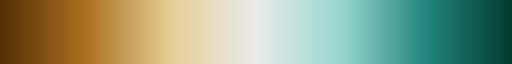

In [22]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('BrBG')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
biasCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('bias_g', colors, N=256)
# display(base_cmap)
display(biasCmapG)

biasCmapG_vmin, biasCmapG_vmax = -1, 1
biasCmapG_norm = matplotlib.colors.Normalize(vmin=biasCmapG_vmin, vmax=biasCmapG_vmax)

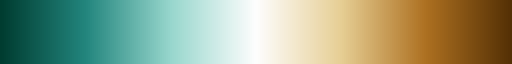

In [23]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('BrBG_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
biasCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('bias_w', colors, N=256)
# display(base_cmap)
display(biasCmapW)

biasCmapW_vmin, biasCmapW_vmax = -1, 1
biasCmapW_norm = matplotlib.colors.Normalize(vmin=biasCmapW_vmin, vmax=biasCmapW_vmax)

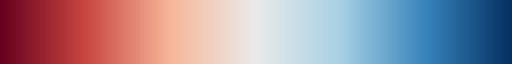

In [24]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('RdBu')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
residCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('residual_g', colors, N=256)
display(residCmapG)

residCmapG_vmin, residCmapG_vmax = -1, 1
residCmapG_norm = matplotlib.colors.Normalize(vmin=residCmapG_vmin, vmax=residCmapG_vmax)

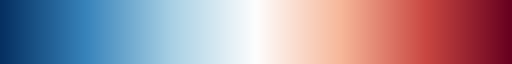

In [25]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('RdBu_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
residCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('residual_w', colors, N=256)
# display(base_cmap)
display(residCmapW)

residCmapW_vmin, residCmapW_vmax = -1, 1
residCmapW_norm = matplotlib.colors.Normalize(vmin=residCmapW_vmin, vmax=residCmapW_vmax)

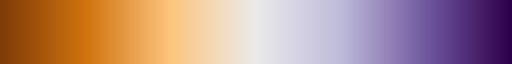

In [26]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('PuOr')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
fitnessCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('fitnessual_w', colors, N=256)
# display(base_cmap)
display(fitnessCmapG)

fitnessCmapG_vmin, fitnessCmapG_vmax = -1, 1
fitnessCmapG_norm = matplotlib.colors.Normalize(vmin=fitnessCmapG_vmin, vmax=fitnessCmapG_vmax)

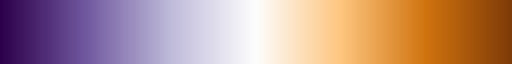

In [27]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('PuOr_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
fitnessCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('fitnessual_w', colors, N=256)
# display(base_cmap)
display(fitnessCmapW)

fitnessCmapW_vmin, fitnessCmapW_vmax = -1, 1
fitnessCmapW_norm = matplotlib.colors.Normalize(vmin=fitnessCmapW_vmin, vmax=fitnessCmapW_vmax)

In [28]:
palette = sns.color_palette('Set2', 8)
groups_colors = {'Diploid': palette[2], 'GPB2': palette[4], 'PDE2': palette[3], 'Other': palette[-2],  'IRA1': palette[-1]}
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

------

## Prelim visualization

In [29]:
viz_assays = viz_samplesInfo['assay'].unique()
viz_assays

array(['hBFA1:21C-R1', 'hBFA1:21C-R2', 'hBFA1:37C-R1', 'hBFA1:37C-R2',
       'hBFA1:48Hr-R1', 'hBFA1:48Hr-R2', 'hBFA1:FLC4-R2',
       'hBFA1:GlyEtOH-R1', 'hBFA1:GlyEtOH-R2', 'hBFA1:SC-R1',
       'hBFA1:SC-R2', 'hBFA1:YPD-R1', 'hBFA1:YPD-R2', 'hBFA1:pH3.8-R1',
       'hBFA1:pH3.8-R2', 'hBFA1:pH7.3-R1', 'hBFA1:pH7.3-R2'], dtype=object)

In [30]:
samples_fig4 = viz_samplesInfo['sample'].unique()
viz_samples = samples_fig4
samples_fig4

array(['hBFA1:21C-R1-8', 'hBFA1:21C-R1-16', 'hBFA1:21C-R1-24',
       'hBFA1:21C-R1-40', 'hBFA1:21C-R2-8', 'hBFA1:21C-R2-16',
       'hBFA1:21C-R2-24', 'hBFA1:21C-R2-40', 'hBFA1:37C-R1-8',
       'hBFA1:37C-R1-16', 'hBFA1:37C-R1-24', 'hBFA1:37C-R1-40',
       'hBFA1:37C-R2-8', 'hBFA1:37C-R2-16', 'hBFA1:37C-R2-24',
       'hBFA1:37C-R2-40', 'hBFA1:48Hr-R1-8', 'hBFA1:48Hr-R1-16',
       'hBFA1:48Hr-R1-24', 'hBFA1:48Hr-R1-40', 'hBFA1:48Hr-R2-8',
       'hBFA1:48Hr-R2-16', 'hBFA1:48Hr-R2-24', 'hBFA1:48Hr-R2-40',
       'hBFA1:FLC4-R2-8', 'hBFA1:FLC4-R2-16', 'hBFA1:FLC4-R2-24',
       'hBFA1:FLC4-R2-40', 'hBFA1:GlyEtOH-R1-8', 'hBFA1:GlyEtOH-R1-16',
       'hBFA1:GlyEtOH-R1-24', 'hBFA1:GlyEtOH-R1-40', 'hBFA1:GlyEtOH-R2-8',
       'hBFA1:GlyEtOH-R2-16', 'hBFA1:GlyEtOH-R2-24',
       'hBFA1:GlyEtOH-R2-40', 'hBFA1:SC-R1-8', 'hBFA1:SC-R1-16',
       'hBFA1:SC-R1-24', 'hBFA1:SC-R1-40', 'hBFA1:SC-R2-8',
       'hBFA1:SC-R2-16', 'hBFA1:SC-R2-24', 'hBFA1:SC-R2-40',
       'hBFA1:YPD-R1-8', 'hBFA1:YP

In [31]:
variants_GCsorted = viz_resids_final.loc[viz_variantsInfo.sort_values(by='barcode_GCratio').index.values, [a for a in viz_samples if 'TX' not in a and 'T0' not in a]].dropna().index.values
print(variants_GCsorted, len(variants_GCsorted))

[2509 2553 2483 ... 1346 2210 2323] 2586


In [32]:
viz_variants_GCsorted = [v for v in variants_GCsorted if v in viz_variants]
print(viz_variants_GCsorted, len(viz_variants_GCsorted))

[2359, 2371, 2393, 2310, 2311, 1959, 2401, 2260, 2273, 2458, 2360, 2396, 2445, 1387, 2343, 2454, 2453, 2349, 1931, 1952, 2369, 1988, 1516, 1626, 1810, 2183, 2304, 2309, 903, 2254, 2255, 2275, 1850, 2246, 2407, 2043, 1970, 723, 1494, 2399, 2398, 2242, 2038, 2284, 2395, 2288, 1522, 1527, 1773, 1535, 2221, 1202, 2234, 2232, 1303, 1859, 2259, 1997, 1852, 2258, 704, 2276, 2277, 2467, 1982, 2250, 2278, 1822, 2415, 1467, 1315, 1977, 2245, 2383, 1299, 1971, 2212, 2112, 2185, 2148, 1937, 2107, 2153, 2366, 1412, 2116, 1627, 2302, 1730, 2152, 881, 1078, 537, 2344, 1045, 1653, 2177, 2203, 1009, 1133, 815, 966, 2329, 2208, 2335, 2163, 1156, 570, 2101, 2321, 1767, 1893, 2330, 2265, 924, 988, 2346, 1395, 1335, 262, 981, 2172, 1338, 974, 2318, 2252, 2020, 2431, 2441, 2337, 2435, 1362, 2437, 662, 2340, 2079, 1039, 2389, 2292, 2059, 356, 937, 2230, 2066, 2223, 2216, 2373, 1204, 1169, 2296, 1193, 1215, 1319, 2058, 1131, 2136, 2130, 884, 2379, 1284, 871, 836, 1098, 2305, 1109, 1118, 741, 1258, 2049, 841, 

In [33]:
viz_fEpsilons = {group: viz_fitnesses_orig[group] - viz_fitnesses_orig[group].mean(axis=0) for group in viz_fitnesses_orig.keys()}
viz_fEpsilons.keys()

dict_keys(['YPD_alpha', 'all'])

In [34]:
viz_fDeltas = {group: viz_fitnesses_final[group] - viz_fitnesses_orig[group] for group in viz_fitnesses_orig.keys()}
viz_fDeltas.keys()

dict_keys(['YPD_alpha', 'all'])

-------------

---------------


#

-------------

#### Prelim look

[]

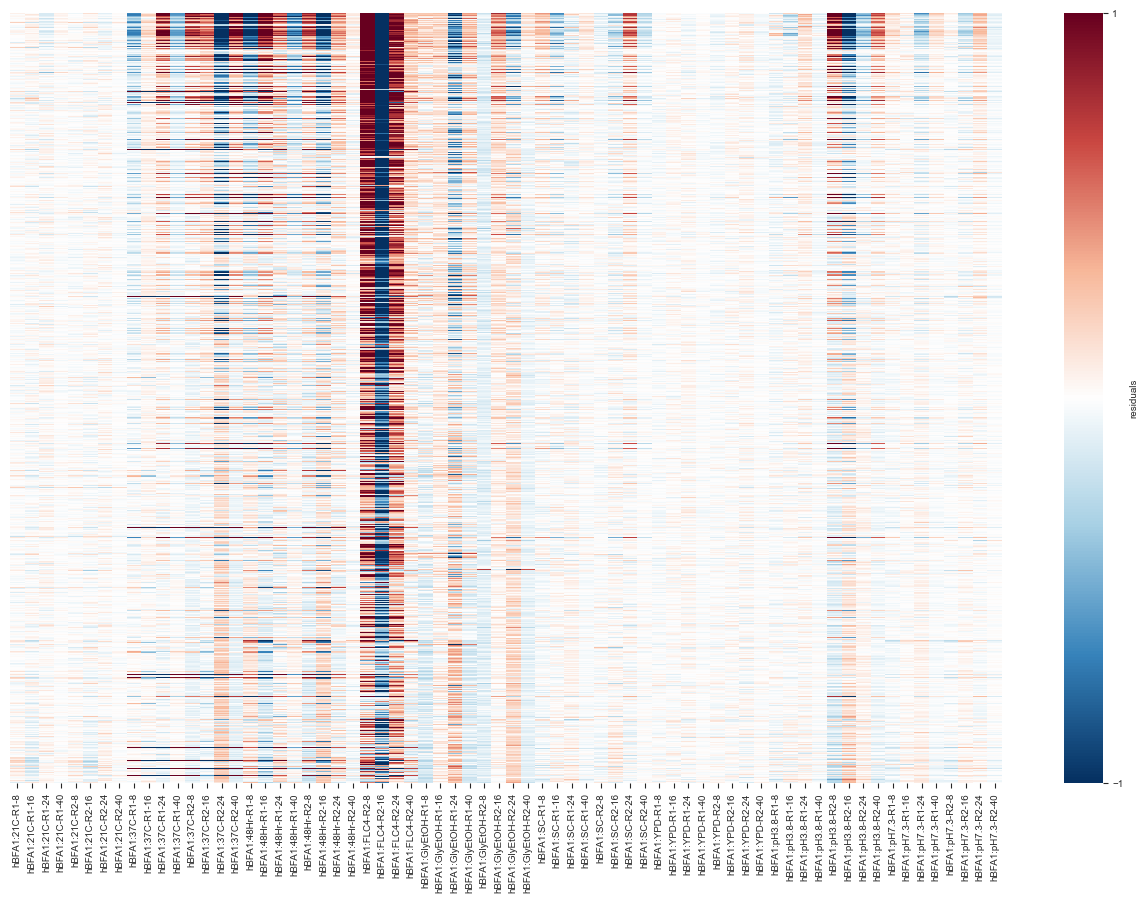

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
hm_residsorig = sns.heatmap(ax=ax, data=viz_resids_orig.loc[viz_variants_GCsorted, viz_samples], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=True, cbar_ax=None, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
ax.set_xticks(np.arange(0.5, len(viz_samples)+0.5, 1))
ax.set_xticklabels(viz_samples, rotation=90)
ax.set_yticks([])

[]

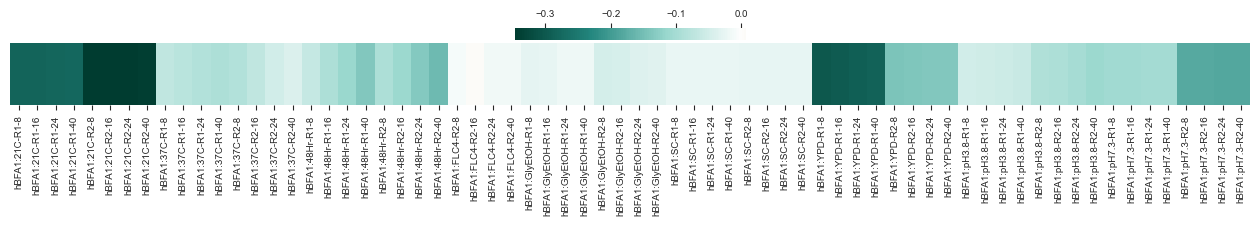

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 1))
sns.heatmap(ax=ax, data=np.atleast_2d(viz_biasprev_final[:]), cmap=biasCmapW, center=0, vmin=None, vmax=None, cbar=True, square=False, cbar_kws={'location': 'top'})
ax.set_xticks(np.arange(0.5, len(viz_samples)+0.5, 1))
ax.set_xticklabels(viz_samples, rotation=90)
ax.set_yticks([])


[]

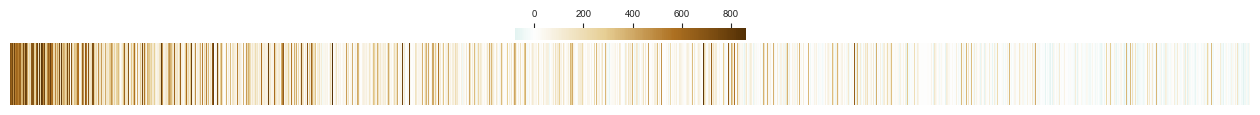

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 1))
sns.heatmap(ax=ax, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]), cmap=biasCmapW, center=0, vmin=None, vmax=None, cbar=True, square=False, cbar_kws={'location': 'top'})
ax.set_xticks([])
ax.set_yticks([])


In [38]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 10))
# hm_residsfinal = sns.heatmap(ax=ax, data=viz_resids_final.loc[viz_variants_GCsorted, viz_samples], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
#                                 cbar=True, cbar_ax=None, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
# ax.set_xticks(np.arange(0.5, len(viz_samples)+0.5, 1))
# ax.set_xticklabels(viz_samples, rotation=90)
# ax.set_yticks([])

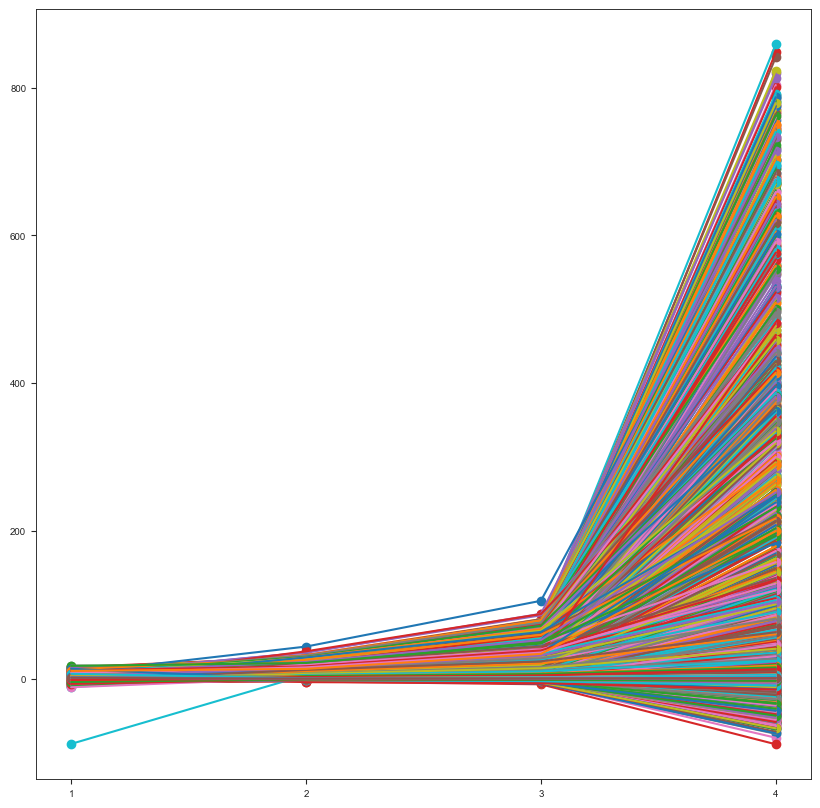

In [43]:
iters = np.array(range(4))
biassusc_byiter = np.zeros((len(viz_variantsInfo), len(iters))) * np.nan

for i in iters:
    variantsInfo_iter = pd.read_csv(results_dir+f'variants_stage1-iter{i+1}.csv')
    # display(variantsInfo_iter)
    # print(variantsInfo_iter.index)
    biassusc_byiter[:, i] = variantsInfo_iter['bias_susceptibility'].values
    # display(biassusc_byiter)
    # break
    
# display(biassusc_byiter)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for u in range(len(biassusc_byiter)):
    ax.plot(iters+1, biassusc_byiter[u, :])
    ax.scatter(iters+1, biassusc_byiter[u, :])
    # break
ax.set_xticks(range(1, 4+1))

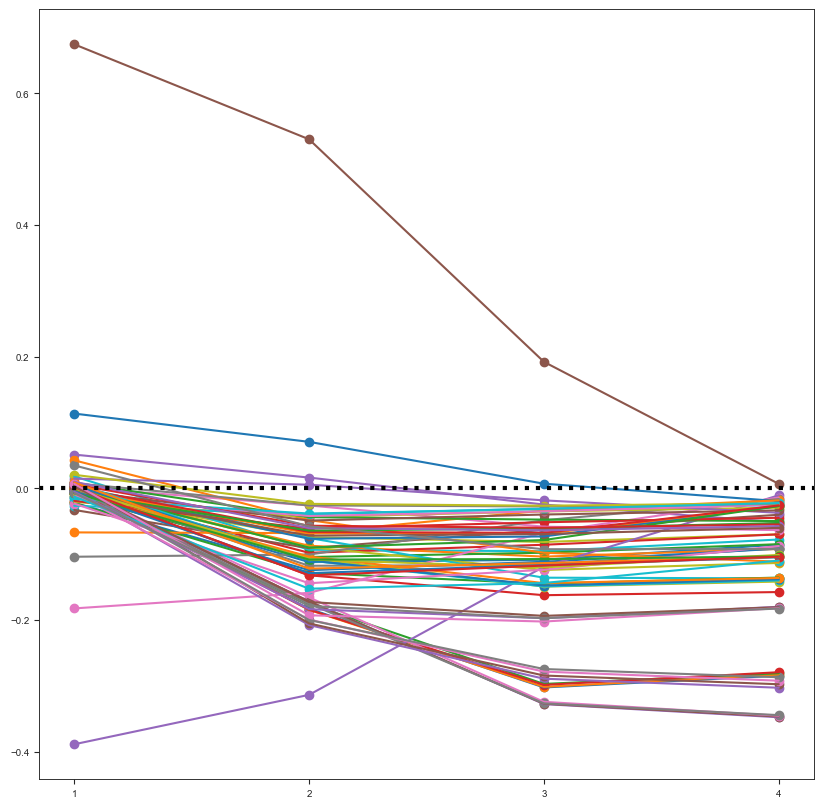

In [44]:
iters = np.array(range(4))
biasprev_byiter = np.zeros((len(viz_samplesInfo), len(iters))) * np.nan

for i in iters:
    samplesInfo_iter = pd.read_csv(results_dir+f'samples_stage1-iter{i+1}.csv')
    # display(samplesInfo_iter)
    # print(samplesInfo_iter.index)
    biasprev_byiter[:, i] = samplesInfo_iter['bias_prevalence'].values
    # display(biasprev_byiter)
    # break
    
# display(biasprev_byiter)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for u in range(len(biasprev_byiter)):
    ax.plot(iters+1, biasprev_byiter[u, :])
    ax.scatter(iters+1, biasprev_byiter[u, :])
    # break
ax.axhline(0, c='k', lw=3, ls=':')
ax.set_xticks(range(1, 4+1))

# ...

# 

#

#

# 

#

#

# 

#

#

# ...

In [ ]:
figsize = (7, 4.0) 
fig4 = plt.figure(constrained_layout=False, figsize=figsize, dpi=250) # 250

gridsize = (int(figsize[0]*10*2), int(figsize[1]*10*2))
gs = fig4.add_gridspec(gridsize[1], gridsize[0])

gridHeight_v       = 2
gridHeight_A       = int(gridsize[1]*0.45)-1
gridHeight_B       = int(gridsize[1]*0.15)
gridHeight_C       = int(gridsize[1]*0.2)-1
gridHeight_D       = int(gridsize[1]*0.4)-1
gridHeight_E       = int(gridsize[1]*0.4)-1

gridHeight_vAspace = 1
gridHeight_ABspace = int(gridsize[1]*0.115)+1
gridHeight_BCspace = int(gridsize[1]*0.085)+1
gridHeight_DEspace = int(1)

gridWidth_uAspace  = 1
gridWidth_ECspace  = 1

gridWidth_u        = 1
gridWidth_ABC      = int(gridsize[0]*0.70)
gridWidth_DE       = int(gridsize[0]*0.22)
gridWidth_EC       = int(gridWidth_ABC/len(samples_fig4)) - gridWidth_ECspace
gridWidth_cbar     = 1

ax4A_u    = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + gridHeight_A), :gridWidth_u])
ax4Av_ECs = []
ax4A_ECs  = []
ax4B_ECs  = []
ax4C_ECs  = []
for i in range(len(samples_fig4)):
    gridx_start = (gridWidth_u + gridWidth_uAspace + i*gridWidth_EC + i*gridWidth_ECspace)
    gridx_end   = gridx_start + gridWidth_EC
    ax4Av_ECs.append( fig4.add_subplot(gs[0:gridHeight_v, gridx_start:gridx_end]) )
    ax4A_ECs.append( fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + gridHeight_A), gridx_start:gridx_end]) )
    ax4B_ECs.append( fig4.add_subplot(gs[(-gridHeight_C - gridHeight_BCspace - gridHeight_B):(-gridHeight_C - gridHeight_BCspace), gridx_start:gridx_end], sharex=ax4B_ECs[0] if i!=0 else None) )
    ax4C_ECs.append( fig4.add_subplot(gs[(-gridHeight_C):, gridx_start:gridx_end], sharex=ax4C_ECs[0] if i!=0 else None) )
ax4A_cbarBias = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + int(gridHeight_A/2)-1), (gridx_end + gridWidth_ECspace)+1:(gridx_end + gridWidth_ECspace + gridWidth_cbar)+1])
ax4A_cbarResids = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace + int(gridHeight_A/2)+1):(gridHeight_v + gridHeight_vAspace + gridHeight_A), (gridx_end + gridWidth_ECspace)+1:(gridx_end + gridWidth_ECspace + gridWidth_cbar)+1])

ax4D = fig4.add_subplot(gs[(1 + gridHeight_v + gridHeight_vAspace):(1 + gridHeight_v + gridHeight_vAspace + gridHeight_D), -gridWidth_DE:])
ax4E = fig4.add_subplot(gs[-(1 + gridHeight_E):-(1+1), -gridWidth_DE:])

for ax in ax4A_ECs + ax4Av_ECs + [ax4A_u, ax4D, ax4E]: 
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sns.heatmap(ax=ax4A_u, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax4A_u.set_xticks([])
ax4A_u.set_yticks([])
# ax4A_u.set_ylabel("bias susceptibility", labelpad=0, fontsize=6)
ax4A_u.text(-2.1, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax4A_u.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")

for c, ECnum in enumerate(samples_fig4):
    
    samples_fig4A_EC = [col for col in viz_resids_final.columns if f"EC{ECnum}" in col]
    print(samples_fig4A_EC)
    # print("aaa")
    #----------
    hm_bias = sns.heatmap(ax=ax4Av_ECs[c], data=viz_biasprev_final[samples_fig4A_EC[1:]], cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                          cbar=(c==len(samples_fig4)-1), cbar_ax=(ax4A_cbarBias if c==len(samples_fig4)-1 else None), cbar_kws=({'label':"bias", 'drawedges':False, 'ticks':[-1, 1]} if c==len(samples_fig4)-1 else None))
    ax4Av_ECs[c].set_xticks([])
    ax4Av_ECs[c].set_yticks([])
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(0*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(1*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(2*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    # for spine in ax4Av_ECs[c].spines.values():
    #     spine.set(visible=True, lw=.3, edgecolor="black")
    # print("bbb")
    #----------
    hm_resids = sns.heatmap(ax=ax4A_ECs[c], data=viz_resids_final.loc[viz_variants_GCsorted, samples_fig4A_EC[1:]], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                            cbar=(c==len(samples_fig4)-1), cbar_ax=(ax4A_cbarResids if c==len(samples_fig4)-1 else None), cbar_kws=({'label':"residuals", 'drawedges':False, 'ticks':[-1, 1]} if c==len(samples_fig4)-1 else None))
    ax4A_ECs[c].set_xticks([])
    ax4A_ECs[c].set_yticks([])
    # print("ccc")
    #----------
    ax4A_ECs[c].text(len(samples_fig4A_EC[:-1])/2, len(viz_variants_GCsorted)+45, assay_relabels[f"EC{ECnum}"], c='k', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(2.25 if len(samples_fig4A_EC[:-1]) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(len(samples_fig4A_EC[:-1])/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(12.25 if len(samples_fig4A_EC[:-1]) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    # ax4A_ECs[c].plot([0, len(samples_fig4A_EC[:-1])], [len(viz_variants_GCsorted)+32, len(viz_variants_GCsorted)+32], c='k', lw=0.5, clip_on=False)
    ax4A_ECs[c].add_patch(mpatches.Rectangle(xy=(0, len(viz_variants_GCsorted)+38), width=len(samples_fig4A_EC[:-1]), height=32, fc='#eee', ec='k', lw=0.0, clip_on=False, zorder=1))
    # print("ddd")
    
    # break
    
ax4Av_ECs[3].text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)

# ax4A_cbarBias.yaxis.label.set_size(4)
# ax4A_cbarBias.yaxis.get_label().set(fontsize=4, position=(0, 0))

ax4A_cbarBias.set_yticks([-1, 1])
ax4A_cbarBias.set_yticklabels([-1, 1], fontsize=4)
ax4A_cbarBias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax4A_cbarBias.tick_params(width=0.5, length=1.33, pad=1)
ax4A_cbarResids.set_yticks([-1, 1])
ax4A_cbarResids.set_yticklabels([-1, 1], fontsize=4)
ax4A_cbarResids.set_ylabel("bias-adj. residuals", fontsize=5, labelpad=-3)
ax4A_cbarResids.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax4A_cbarBias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax4A_cbarResids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
    
ax4A_u.text(-4, -55, "A", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4A_u.text(-4, 425, "B", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4A_u.text(-4, 610, "C", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

vizGroups_fig4B = ['Diploid', 'GPB2', 'PDE2']

for c, ECnum in enumerate(samples_fig4):
    viz_assays_EC = [col for col in viz_fitnesses_final['all'].columns if f"EC{ECnum}" in col]
    print(viz_assays_EC)
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g_a = np.array([])
        viz_fitnesses_final_g_a = np.array([])
        for a, assay in enumerate(viz_assays_EC):
            viz_fitnesses_orig_g_a  = np.hstack([viz_fitnesses_orig_g_a, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g_a = np.hstack([viz_fitnesses_final_g_a, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g_a, viz_fitnesses_final_g_a).pvalue
        if(pvalue < 0.05):
            ax4B_ECs[c].text(np.percentile(viz_fitnesses_final_g_a, 99)+(0.025 if ECnum == 20 and group == 'PDE2' else 0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g_a)
        boxplot_fitnesses.append(viz_fitnesses_final_g_a)
    
    bplot = ax4B_ECs[c].boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax4B_ECs[c].set_xticks([0, 1])
    ax4B_ECs[c].set_xticklabels([0, 1], fontsize=5)
    ax4B_ECs[c].set_xlabel('')
    ax4B_ECs[c].set_yticks(box_positions if c==0 else []) # if c!=0 else [1, 2, 3])
    ax4B_ECs[c].set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if c==0 else [], fontsize=5) # if c!=0 else ['Dip.', 'GPB2', 'PDE2'], fontsize=4)    
    ax4B_ECs[c].set_ylabel('')    
    ax4B_ECs[c].tick_params(width=0.5, length=1.33, pad=2)
    
    ax4B_ECs[c].set_facecolor('#fff')
    
    for spine in ax4B_ECs[c].spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    # break
    
ax4B_ECs[3].text(-0.25, -0.875, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for c, ECnum in enumerate(samples_fig4):
    viz_assays_EC = [col for col in viz_fitnesses_final['all'].columns if f"EC{ECnum}" in col]
    print(viz_assays_EC)
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in viz_assays_EC])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in viz_assays_EC])
    
        sns.regplot(ax=ax4C_ECs[c], x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    ax4C_ECs[c].set_xlabel('')
    ax4C_ECs[c].set_ylabel('')    
    
    ax4C_ECs[c].set_xlim((-1.05, 1.05))
    ax4C_ECs[c].set_xticks([-1, 0, 1])
    ax4C_ECs[c].set_xticklabels([-1, 0, 1], fontsize=5)
    ax4C_ECs[c].set_ylim((-1.05, 1.05))
    ax4C_ECs[c].set_yticks([-1, 0, 1] if c==0 else [])
    ax4C_ECs[c].set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax4C_ECs[c].tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax4C_ECs[c].spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
            
    if(c == len(samples_fig4)-1):
        ax4C_ECs[c].text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax4C_ECs[c].plot([0.10, 0.30], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax4C_ECs[c].plot([-0.95, -0.75], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax4C_ECs[c].plot([-2.09, -1.89], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
    

ax4C_ECs[0].set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        

ax4C_ECs[3].text(-1.1, -1.65, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
    
    viz_fEpsilons_g = viz_fEpsilons[group]

    U_g, s_g, VT_g = np.linalg.svd(viz_fEpsilons_g.dropna(axis=1).values[:, :])
    
    u_svd_g    = (s_g[0])*U_g[:, 0]
    u_method_g = viz_biassusc_final[viz_fEpsilons_g.index.tolist()]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((u_svd_g), (u_method_g))
    # print("u_svd X u_method_g:", group, "m =", slope, "intc =", intercept, "r^2 =", r_value**2, "p =", p_value, "stderr =", std_err)
    
    if('Diploid' in group):
        ax4D.plot((-1 if slope<0 else 1)*(u_svd_g), (u_method_g), marker='+', ms=2, mew=0.5, ls='none', alpha=0.33, c=groups_colors[group], label=f"{group}", zorder=-100)
    elif('IRA' not in group):  
        sns.regplot(ax=ax4D, x=(-1 if slope<0 else 1)*(u_svd_g), y=(u_method_g), ci=0, label=f"{group} ($r^2 = ${r_value**2:.2f})",
                   color=groups_colors[group], marker=('+' if 'Diploid' in group else 'o'), 
                    scatter_kws={'alpha': 0.5, 's': 4, 'lw': 0, 'zorder': -g}, line_kws={'lw': 1.0, 'zorder': -g})
    
    gcratio = viz_variantsInfo.loc[viz_fEpsilons_g.index.tolist(), 'barcode_GCratio'].values
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(1-(gcratio), (u_method_g))
    # print("gcratio X u_method_g:", group, "m =", slope, "intc =", intercept, "r^2 =", r_value**2, "p =", p_value, "stderr =", std_err)

    if('Diploid' in group):
        ax4E.plot((1 if group != 'PDE2' else -1)*(u_svd_g), 1-(gcratio), marker='+', ms=2, mew=0.5, ls='none', alpha=0.33, c=groups_colors[group], label=f"{group}", zorder=-100)
    elif('IRA' not in group):  
        sns.regplot(ax=ax4E, y=1-(gcratio), x=(-1 if group != 'PDE2' else 1)*(u_svd_g), ci=0, label=f"{group} ($r^2 = ${r_value**2:.2f})", 
                   color=groups_colors[group], marker=('+' if 'Diploid' in group else 'o'), 
                    scatter_kws={'alpha': 0.5, 's': 4, 'lw': 0, 'zorder': -g}, line_kws={'lw': 1.0, 'zorder': -g})

ax4E.set_xlabel("$\hat{u}_i^{~(SVD)}$", labelpad=0, fontsize=6) # 
ax4E.set_xticks([-1, 0, 1, 2])
ax4E.set_xticklabels([-1, 0, 1, 2], fontsize=5)
ax4E.set_ylabel("1 - GC-ratio", labelpad=-2, fontsize=6)
ax4E.set_ylim((0, 1))
ax4E.set_yticks([0, 0.5, 1], fontsize=5)
ax4E.set_yticklabels([0, '', 1], fontsize=5)
legend4BC1 = ax4E.legend(scatterpoints=1, scatteryoffsets=[0], frameon=False, loc='lower right',  handletextpad=-0.25, labelspacing=0.2, fontsize=5)
for labeltext in legend4BC1.get_texts(): 
    if(labeltext.get_text() != 'Diploid'):
        labeltext.set_va('center_baseline')

ax4E.tick_params(width=0.5, length=2, pad=2)
for spine in ax4E.spines.values():
    spine.set_edgecolor('#000')
    spine.set_linewidth(0.5)
        
ax4D.set_xlabel("$\hat{u}_i^{~(SVD)}$", labelpad=0, fontsize=6) #^{~(SVD)}
ax4D.set_ylabel("$\hat{u}_{i}^{~(method)}$", labelpad=-2, fontsize=6) # ^{~(method)}
ax4D.set_xlim((-1.5, 2.5))
ax4D.set_ylim((-1.5, 2.5))
ax4D.set_xticks([-1, 0, 1, 2])
ax4D.set_yticks([-1, 0, 1, 2])
ax4D.set_xticklabels([-1, 0, 1, 2], fontsize=5)
ax4D.set_yticklabels([-1, 0, 1, 2], fontsize=5)
ax4D.legend(frameon=False, loc='upper left', fontsize=5)
legend4BC0 = ax4D.legend(scatterpoints=1,scatteryoffsets=[0], frameon=False, loc='upper left', bbox_to_anchor=(-0.05, 1.0), handletextpad=-0.25, labelspacing=0.2, fontsize=5)
for labeltext in legend4BC0.get_texts(): 
    if(labeltext.get_text() != 'Diploid'):
        labeltext.set_va('center_baseline')

ax4D.tick_params(width=0.5, length=2, pad=2)
for spine in ax4D.spines.values():
    spine.set_edgecolor('#000')
    spine.set_linewidth(0.5)
    
ax4E.text(-1.5, 2.575, "D", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4E.text(-1.5, 1.125, "E", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
# ax4A_ECs[0].add_patch(mpatches.Rectangle(xy=(-10, 0), width=1, height=10, fc='#000', ec='w', lw=0.0, clip_on=False, zorder=-999))
        
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.show()


In [ ]:
# fig4.savefig(f"./figures/fig4_{date}.png", dpi=300)

------

## Supplementary Figs

In [ ]:
assaysets_figSI = ['EC23', 'EC21', 'EC20', 'EC18', 'EC13', 'EC3']
assaysets_figSI

In [ ]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if f"EC{ECnum}" in col] for ECnum in samples_fig4])
viz_assays

In [ ]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if f"EC{ECnum}" in col] for ECnum in [23, 21, 20, 18, 13, 3]])
viz_samples
print(len(viz_samples))

In [ ]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], -2:-1])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, -2:-1])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(samples_figSI_aset)
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsorig.text(len(samples_figSI_aset)/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsorig.text(12.25 if len(samples_figSI_aset) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsorig.text(15, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=viz_biasprev_final[samples_figSI_aset], cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 3):
        ax_biasprev.text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset], cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsfinal.text(len(samples_figSI_aset)/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsfinal.text(12.25 if len(samples_figSI_aset) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsfinal.text(15, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 3):
        ax_fitnessdistns.text(-0.6, -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 3):
        ax_fitnessdeltas.text(-1.1, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [ ]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt1_{date}.png", dpi=300)

------

In [ ]:
assaysets_figSI = ['Baffled', '1.4%Gluc', '1.6%Gluc', '1.8%Gluc', '0.5%Raf', '1.5%Suc1%Raf'] #, '0.2MKCl', '0.5MKCl', 'M3']
# assaysets_figSI = list(set([col.split('-')[0] for col in viz_fitnesses_final['all'].columns if 'EC' not in col.split('-')[0]]))[::-1]
assaysets_figSI

In [ ]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if assayset in col] for assayset in assaysets_figSI])
viz_assays

In [ ]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if assayset in col] for assayset in assaysets_figSI])
viz_samples
print(len(viz_samples))

In [ ]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], -2:-1])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, -2:-1])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(len(samples_figSI_aset))
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    df_residsorig = viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsorig = df_residsorig.reindex(columns=np.concatenate([df_residsorig.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=df_residsorig, cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsorig.text(15, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    df_biasprev = viz_biasprev_final[samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_biasprev = df_biasprev.reindex(columns=np.concatenate([df_biasprev.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=df_biasprev, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 3):
        ax_biasprev.text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    df_residsfinal = viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsfinal = df_residsfinal.reindex(columns=np.concatenate([df_residsfinal.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=df_residsfinal, cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsfinal.text(15, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 3):
        ax_fitnessdistns.text(-0.6, -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 3):
        ax_fitnessdeltas.text(-1.1, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    # break

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [ ]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt2_{date}.png", dpi=300)

------

In [ ]:
assaysets_figSI = ['0.2MKCl', '0.5MKCl', 'M3'] # ['Baffled', '1.4%Gluc', '1.6%Gluc', '1.8%Gluc', '0.5%Raf', '1.5%Suc1%Raf'] #, 
# assaysets_figSI = list(set([col.split('-')[0] for col in viz_fitnesses_final['all'].columns if 'EC' not in col.split('-')[0]]))[::-1]
assaysets_figSI

In [ ]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if assayset in col] for assayset in assaysets_figSI])
viz_assays

In [ ]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if assayset in col] for assayset in assaysets_figSI])
viz_samples
print(len(viz_samples))

In [ ]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], 35:36])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, 35:36])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(len(samples_figSI_aset))
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    df_residsorig = viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsorig = df_residsorig.reindex(columns=np.concatenate([df_residsorig.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=df_residsorig, cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(17., len(viz_variants_GCsorted)+7, f"rep4", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 2):
        ax_residsorig.text(21, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    df_biasprev = viz_biasprev_final[samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_biasprev = df_biasprev.reindex(columns=np.concatenate([df_biasprev.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=df_biasprev, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=len(samples_figSI_aset)+1, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(3*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 1):
        ax_biasprev.text(7., -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    df_residsfinal = viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsfinal = df_residsfinal.reindex(columns=np.concatenate([df_residsfinal.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=df_residsfinal, cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(17., len(viz_variants_GCsorted)+7, f"rep4", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 2):
        ax_residsfinal.text(21, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 1):
        ax_fitnessdistns.text(-0., -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 1):
        ax_fitnessdeltas.text(0, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    # break

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [ ]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt3_{date}.png", dpi=300)

------

In [ ]:
viz_assays = [  'EC23-R1', 'EC23-R2', 'EC23-R3', 
                'EC21-R1', 'EC21-R2', 'EC21-R3',
                'EC20-R1', 'EC20-R2', 'EC20-R3', 
                'EC18-R1', 'EC18-R2', 'EC18-R3',
                'EC13-R1', 'EC13-R2', 'EC13-R3', 
                'EC3-R1', 'EC3-R2', 'EC3-R3',
                'Baffled-R1', 'Baffled-R2',
                '1.4%Gluc-R1', '1.4%Gluc-R2',
                '1.6%Gluc-R1', '1.6%Gluc-R2',
                '1.8%Gluc-R1', '1.8%Gluc-R2', 
                '0.5%Raf-R1', '0.5%Raf-R2',
                '1.5%Suc1%Raf-R1', 
                '0.2MKCl-R1',
                '0.5MKCl-R1',
                'M3-R1', 'M3-R2', 'M3-R3', 'M3-R4' ]
viz_assays

In [ ]:
def linear_regression(x, y, w=None):
    xw = w*x if w is not None else x
    yw = w*y if w is not None else y
    if(not np.any(yw)):
        slope     = 0
        intercept = 0
    else:
        n = len(x)
        xw_mean = np.sum(xw)/n
        yw_mean = np.sum(yw)/n
        w_mean  = np.sum(w)/n if w is not None else 1
        slope     = np.sum(xw * (y - yw_mean/w_mean)) / np.sum(xw * (x - xw_mean/w_mean))
        intercept = (1/w_mean)*(yw_mean - slope*xw_mean)
    return slope, intercept

In [ ]:
figSI, ax = plt.subplots(7, 5, sharex=True, sharey=True, figsize=(5.0, 7.7), dpi=200)

biassusc_allVariants = viz_variantsInfo.loc[:, 'bias_susceptibility'].values
    
controlVariants = viz_variantsInfo[viz_variantsInfo['control_set'] == True].index.values
    
for a, assay in enumerate(viz_assays):
    # print(a, a//5, a%5, assay)
    r = a//5
    c = a%5
    
    assayInfo  = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a  = assayInfo['sample'].unique()
    timepts_a  = assayInfo['timept'].values
    biasprev_a = assayInfo['bias_prevalence'].values

    trustworthyVariants_a = np.where(viz_trustworthy[assay]==True)[0]
    trustworthyControlVariants_a = list(set(controlVariants).intersection(trustworthyVariants_a))

    biassusc_a = biassusc_allVariants[trustworthyControlVariants_a]

    fitnesses_endstage1 = pd.read_csv('./results/fitnesses_stage1-iter5.csv')
    fitnesses_controlSet_a  = fitnesses_endstage1.loc[trustworthyControlVariants_a, assay].values

    #----

    delta_f_a = fitnesses_controlSet_a - fitnesses_controlSet_a.mean() # fitness misestimates among control set

    lambda_a, v_intcpt_a = linear_regression(x=biassusc_a, y=delta_f_a)     

    #---------------------------

    ax[a//5, a%5].scatter(biassusc_a, delta_f_a, s=4, alpha=0.5, color=groups_colors['Diploid'], linewidth=0)
    lambda_color = biasCmapG(biasCmapG_norm(-lambda_a))
    ax[a//5, a%5].plot(np.sort(biassusc_a), lambda_a*np.sort(biassusc_a) + v_intcpt_a, color=lambda_color, label="$\hat{\lambda} = $"+f"{round(lambda_a, 2)}")

    leg = ax[a//5, a%5].legend(handlelength=0, handletextpad=0, fancybox=True, prop={'size': 5}, loc='lower left')
    for item in leg.legendHandles:
        item.set_visible(False)
    leg.get_frame().set_facecolor(lambda_color)
    leg.get_frame().set_edgecolor(None)

    ax[r, c].set_xticks([-1, 0, 1])
    ax[r, c].set_xticklabels([-1, 0, 1], fontsize=5)
    ax[r, c].set_yticks([-0.5, 0, 0.5])
    ax[r, c].set_yticklabels(["−0.5", "0.0", "0.5"], fontsize=5)
    
    if(r == 3 and c == 0):
        ax[r, c].set_ylabel("fitness misestimates ($\delta\!f$)", fontsize=6)
    if(r == 6 and c == 2):
        ax[r, c].set_xlabel("inferred bias susceptibility ($\hat{u}$)", fontsize=6)
        
    ax[r, c].set_title(assay_relabels[assay.split('-')[0]]+" rep"+assay[-1], fontsize=6)
    
    
figSI.tight_layout()

plt.show()
    
    

In [ ]:
figSI.savefig(f"./figures/figSI-stage2lambdas_{date}.png", dpi=300)

----------

In [ ]:
figSI, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(7.0, 2.25), dpi=200)

biassusc_allVariants = viz_variantsInfo.loc[:, 'bias_susceptibility'].values
    
controlVariants = viz_variantsInfo[viz_variantsInfo['control_set'] == True].index.values
    
for a, assay in enumerate(['EC21-R2']):
    
    assayInfo  = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a  = assayInfo['sample'].unique()
    timepts_a  = assayInfo['timept'].values
    biasprev_a = assayInfo['bias_prevalence'].values
    baseline_a = assayInfo['normalization_factor'].values
    
    trustworthyVariants_a = np.where(viz_trustworthy[assay]==True)[0]
    trustworthyControlVariants_a = list(set(controlVariants).intersection(trustworthyVariants_a))
    np.random.seed(285) # 285 568 42 : 7 > 3/5/6 > 2 > 1
    viz_variants = np.random.choice(trustworthyControlVariants_a, size=8)
    print(viz_variants)
    
    biassusc_a = biassusc_allVariants[viz_variants]
    
    #--------------------
    
    counts_raw = viz_counts.loc[viz_variants, samples_a].values
    
    counts_obs = counts_raw/baseline_a
    
    counts_adj = (counts_raw/baseline_a)*np.exp(biassusc_a[:, np.newaxis] * biasprev_a[np.newaxis, :])

    #--------------------
    
    palette = sns.color_palette('hls', len(viz_variants))
    
    for i, counts_raw_i in enumerate(counts_raw):
        
        ax[0].set_title("Raw")
        
        ax[0].plot(timepts_a, np.log(counts_raw_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[0].scatter(timepts_a, np.log(counts_raw_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        ax[0].set_ylabel('Raw log-counts: $\\log(\\mathcal{C}_{i,t})$', labelpad=0)
        ax[0].set_xlabel('samples ($t$)')        
    
    for i, counts_obs_i in enumerate(counts_obs):
        
        ax[1].set_title("\"Observed\"")
        
        ax[1].plot(timepts_a, np.log(counts_obs_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[1].scatter(timepts_a, np.log(counts_obs_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        slope_i, intcpt_i = linear_regression(x=timepts_a, y=np.log(counts_obs_i))
        ax[1].plot(timepts_a, slope_i*timepts_a + intcpt_i, color=palette[i], ls='-', lw=1.1)
        
        ax[1].set_ylabel('Observed log-counts: $\\log({C}_{i,t})$', labelpad=0)
        ax[1].set_xlabel('samples ($t$)')        
        
    for i, counts_adj_i in enumerate(counts_adj):
        
        ax[2].set_title("Bias-adjusted")
        
        ax[2].plot(timepts_a, np.log(counts_adj_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[2].scatter(timepts_a, np.log(counts_adj_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        slope_i, intcpt_i = linear_regression(x=timepts_a, y=np.log(counts_adj_i))
        ax[2].plot(timepts_a, slope_i*timepts_a + intcpt_i, color=palette[i], ls='-', lw=1.1)
        
        ax[2].set_ylabel('Bias-adjusted log-counts: $\\log({A}_{i,t})$', labelpad=0)
        ax[2].set_xlabel('samples ($t$)')
    
    
figSI.tight_layout()

plt.show()
    
    

In [ ]:
figSI.savefig(f"./figures/figSI-countsrawobsadj_{date}.png", dpi=300)

-----------